<a href="https://colab.research.google.com/github/shubhamgautam1211/Semantic-Similarity-Transformer/blob/main/Semantic_Similarity_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Semantic Similarity - Enterpret Assignment/train.xlsx")
df.head()

,text,reason,label
0,this is an amazing app for online classes!but,good app for conducting online classes,1.0
1,very practical and easy to use,app is user-friendly,1.0
2,this app is very good for video conferencing.,good for video conferencing,1.0
3,i can not download this zoom app,unable to download zoom app,1.0
4,i am not able to download this app,want to download the app,1.0


In [ ]:
df.shape

(2061, 3)

In [ ]:
df.info()
dfi.export(
     df,
    "info.png",
    table_conversion="matplotlib",
    max_rows = 15
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    2061 non-null   object 
 1   reason  2061 non-null   object 
 2   label   2061 non-null   float64
dtypes: float64(1), object(2)
memory usage: 48.4+ KB


Total Counts of label sets = 2061
--------------------------------------------------------------------------


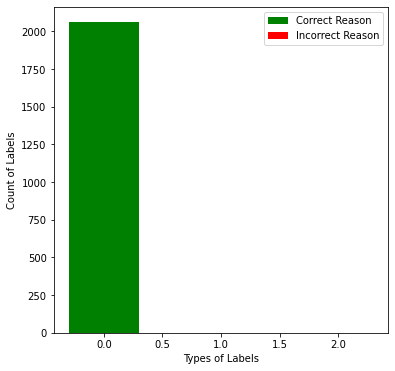

In [ ]:
count= df['label'].value_counts()
count2 = df['label'].count()

print('Total Counts of label sets ='.format(),count2)

print("--------------------------------------------------------------------------")

#Creating a function to plot the counts using matplotlib
def plot_counts(count_good,count_bad):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_good,width=0.6,label='Correct Reason',color='Green')
    plt.legend()
    plt.bar(2,count_bad,width=0.6,label='Incorrect Reason',color='Red')
    plt.legend()
    plt.ylabel('Count of Labels')
    plt.xlabel('Types of Labels')
    plt.savefig("train_count_labels.png")
    plt.show()

count_good = df[df['label']== 1.0]
count_bad =  df[df['label']!= 1.0]

plot_counts(len(count_good),len(count_bad))
 


Text Words:0        8
1        6
2        8
3        7
4        8
        ..
2056     7
2057     5
2058     8
2059    13
2060    16
Name: text, Length: 2061, dtype: int64
Reason Words:0       6
1       3
2       4
3       5
4       5
       ..
2056    6
2057    4
2058    6
2059    7
2060    8
Name: reason, Length: 2061, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


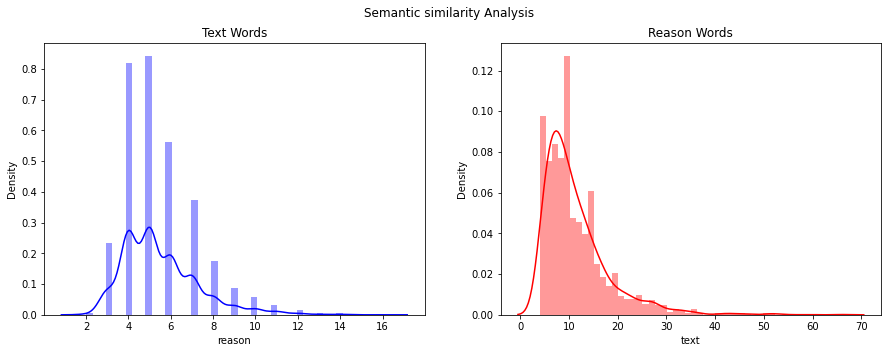

In [ ]:
#Analyse the count of words in each segment
#Function for checking word length

def cal_len(data):
    return len(data)

#Create generic plotter with Seaborn
def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.savefig("train_count_words.png")
    plt.show()   


count_text = df['text'].str.split().apply(lambda z:cal_len(z))
count_reasons = df['reason'].str.split().apply(lambda z:cal_len(z))

print("Text Words:" + str(count_text))
print("Reason Words:" + str(count_reasons))

plot_count(count_text,count_reasons,"Text Words","Reason Words","Semantic similarity Analysis") 

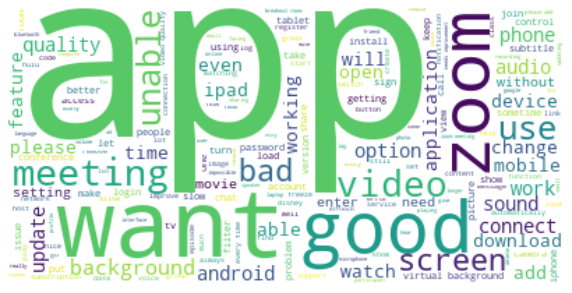

In [ ]:
from PIL import Image
from wordcloud import WordCloud,STOPWORDS
def display_cloud(data,color):
    plt.subplots(figsize=(10,10))
    wc = WordCloud(stopwords=STOPWORDS, 
                   background_color="white", contour_width=2, contour_color=color,
                   max_words=2000, max_font_size=256,
                   random_state=42)
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.savefig("train_wordcloud.png")
    plt.show()
    
display_cloud(df['text']+df['reason'],'red')

In [ ]:
pip install dataframe-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.6 MB 14.2 MB/s 


In [ ]:
import dataframe_image as dfi

In [ ]:
import re

def remove_specChar(data):
    s1=re.sub("[^A-Za-z]"," ",data)
    return s1

df['clean_text'] = df['text'].apply(lambda z: remove_specChar(z))
df['clean_reason'] = df['reason'].apply(lambda z2: remove_specChar(z2))

df

,text,reason,label,clean_text,clean_reason
0,this is an amazing app for online classes!but,good app for conducting online classes,1.0,this is an amazing app for online classes but,good app for conducting online classes
1,very practical and easy to use,app is user-friendly,1.0,very practical and easy to use,app is user friendly
2,this app is very good for video conferencing.,good for video conferencing,1.0,this app is very good for video conferencing,good for video conferencing
3,i can not download this zoom app,unable to download zoom app,1.0,i can not download this zoom app,unable to download zoom app
4,i am not able to download this app,want to download the app,1.0,i am not able to download this app,want to download the app
...,...,...,...,...,...
2056,i am not getting jio tv properly.,unable to use with jio tv,1.0,i am not getting jio tv properly,unable to use with jio tv
2057,(learn from the netflix interface),netflix ui is better,1.0,learn from the netflix interface,netflix ui is better
2058,"hello,\ndisney+ must also be installed on chro...",unable to use disney on chromecast,1.0,hello disney must also be installed on chrom...,unable to use disney on chromecast
2059,it is a shame that disney+ does not work on tv...,unable to use disney plus on tv,1.0,it is a shame that disney does not work on tv...,unable to use disney plus on tv


In [ ]:
import re

def small_case(data):
    s1= data.lower()
    return s1

df['clean_text'] = df['clean_text'].apply(lambda z: small_case(z))
df['clean_reason'] = df['clean_reason'].apply(lambda z2: small_case(z2))

dfi.export(
     df,
    "train_clean.png",
    table_conversion="matplotlib",
    max_rows = 15
)

df

,text,reason,label,clean_text,clean_reason
0,this is an amazing app for online classes!but,good app for conducting online classes,1.0,this is an amazing app for online classes but,good app for conducting online classes
1,very practical and easy to use,app is user-friendly,1.0,very practical and easy to use,app is user friendly
2,this app is very good for video conferencing.,good for video conferencing,1.0,this app is very good for video conferencing,good for video conferencing
3,i can not download this zoom app,unable to download zoom app,1.0,i can not download this zoom app,unable to download zoom app
4,i am not able to download this app,want to download the app,1.0,i am not able to download this app,want to download the app
...,...,...,...,...,...
2056,i am not getting jio tv properly.,unable to use with jio tv,1.0,i am not getting jio tv properly,unable to use with jio tv
2057,(learn from the netflix interface),netflix ui is better,1.0,learn from the netflix interface,netflix ui is better
2058,"hello,\ndisney+ must also be installed on chro...",unable to use disney on chromecast,1.0,hello disney must also be installed on chrom...,unable to use disney on chromecast
2059,it is a shame that disney+ does not work on tv...,unable to use disney plus on tv,1.0,it is a shame that disney does not work on tv...,unable to use disney plus on tv


# **Training Model**

In [ ]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.8 MB/s 
     |████████████████████████████████| 5.3 MB 49.0 MB/s 
     |████████████████████████████████| 1.3 MB 54.1 MB/s 
     |████████████████████████████████| 163 kB 76.6 MB/s 
     |████████████████████████████████| 7.6 MB 42.9 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=efcc29676c2685828662f183314d812cdad8b03de7731e8b9ff544a365df0c3e
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer,util

In [ ]:
from sentence_transformers import SentenceTransformer,util
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences_text = []
sentences_reason = []
df['clean_text'].apply(lambda z: sentences_text.append(z))
df['clean_reason'].apply(lambda z: sentences_reason.append(z))

#Sentences are encoded by calling model.encode()
embeddings_text = model.encode(sentences_text)
embeddings_reason = model.encode(sentences_reason)

#Print the embeddings
for sentence, embedding in zip(sentences_text, embeddings_text):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    break

for sentence, embedding in zip(sentences_reason, embeddings_reason):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    break

Sentence: this is an amazing app for online classes but
Embedding: [-6.50073364e-02 -4.67748977e-02 -3.02616395e-02 -4.58485261e-02
  2.51682512e-02 -8.23333114e-03  3.03148921e-03  1.04507040e-02
 -1.15661817e-02 -1.01253483e-02  1.37016755e-02  5.11317253e-02
  1.32452240e-02 -6.58478588e-02  3.89785593e-04 -6.65683821e-02
  3.08362488e-02  3.90748307e-02 -2.24363115e-02 -6.87449798e-02
  3.61473337e-02  1.70451086e-02  2.93219686e-02  3.50234844e-02
  1.94300506e-02 -1.52479978e-02 -4.70669977e-02 -1.11328503e-02
  8.70254934e-02 -6.83029369e-02 -6.62675276e-02  1.45337172e-02
  3.50653753e-02  5.14648370e-02 -1.01822577e-01 -5.37514910e-02
  4.28954735e-02  1.80197340e-02 -8.30819160e-02  1.20775141e-02
 -1.08200036e-01  1.58610325e-02  9.79048200e-03  1.74491983e-02
  1.42230187e-02 -8.01199749e-02 -8.34907442e-02 -1.78942084e-02
  1.00389645e-01  3.47289070e-02 -9.67717823e-03 -1.21431634e-01
 -5.79837039e-02 -5.34769380e-03 -1.08552091e-01  1.13226317e-01
  3.30072939e-02 -8.253

In [ ]:
cosine_scores = util.cos_sim(embeddings_text, embeddings_reason)

#Output the pairs with their score
for i in range(len(sentences_text)):
    print("{} \t {} \t Score: {:.4f}".format(sentences_text[i], sentences_reason[i], cosine_scores[i][i]))
    break

this is an amazing app for online classes but 	 good app for conducting online classes 	 Score: 0.8426


In [ ]:
predicted_label = []
for i in range(len(sentences_text)):
  if cosine_scores[i][i] > 0.5:
    predicted_label.append(1.0)
  else:
    predicted_label.append(0.0)

df['predicted_label'] = predicted_label

df

,text,reason,label,clean_text,clean_reason,predicted_label
0,this is an amazing app for online classes!but,good app for conducting online classes,1.0,this is an amazing app for online classes but,good app for conducting online classes,1.0
1,very practical and easy to use,app is user-friendly,1.0,very practical and easy to use,app is user friendly,0.0
2,this app is very good for video conferencing.,good for video conferencing,1.0,this app is very good for video conferencing,good for video conferencing,1.0
3,i can not download this zoom app,unable to download zoom app,1.0,i can not download this zoom app,unable to download zoom app,1.0
4,i am not able to download this app,want to download the app,1.0,i am not able to download this app,want to download the app,1.0
...,...,...,...,...,...,...
2056,i am not getting jio tv properly.,unable to use with jio tv,1.0,i am not getting jio tv properly,unable to use with jio tv,1.0
2057,(learn from the netflix interface),netflix ui is better,1.0,learn from the netflix interface,netflix ui is better,1.0
2058,"hello,\ndisney+ must also be installed on chro...",unable to use disney on chromecast,1.0,hello disney must also be installed on chrom...,unable to use disney on chromecast,1.0
2059,it is a shame that disney+ does not work on tv...,unable to use disney plus on tv,1.0,it is a shame that disney does not work on tv...,unable to use disney plus on tv,1.0


# **Evaluation**

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Semantic Similarity - Enterpret Assignment/evaluation.xlsx")
df.head()

,text,reason,label
0,the app is crashing when i play a vedio,app crashes during playback,1.0
1,but i want to connect it to the tv from one de...,want compatibility with more smart televisions,0.0
2,very helpful when and home working remotley,good app for work,0.0
3,this zoom so called and missed call and mobile...,receiving incorrect phone number message,0.0
4,one of my favorite apps,good for spending time,0.0


In [ ]:
df.shape

(9000, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    9000 non-null   object 
 1   reason  9000 non-null   object 
 2   label   9000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 211.1+ KB


Total Counts of label sets = 9000
--------------------------------------------------------------------------


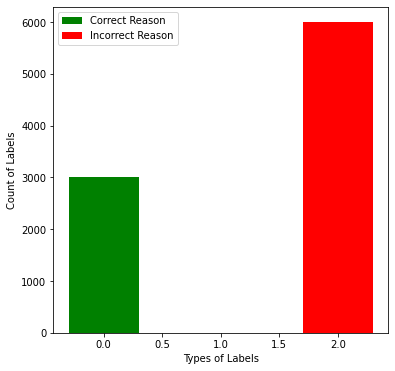

In [ ]:
count= df['label'].value_counts()
count2 = df['label'].count()

print('Total Counts of label sets ='.format(),count2)

print("--------------------------------------------------------------------------")

#Creating a function to plot the counts using matplotlib
def plot_counts(count_good,count_bad):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_good,width=0.6,label='Correct Reason',color='Green')
    plt.legend()
    plt.bar(2,count_bad,width=0.6,label='Incorrect Reason',color='Red')
    plt.legend()
    plt.ylabel('Count of Labels')
    plt.xlabel('Types of Labels')
    plt.savefig("evaluation_count_labels.png")
    plt.show()

count_good = df[df['label']== 1.0]
count_bad =  df[df['label']!= 1.0]

plot_counts(len(count_good),len(count_bad))

Text Words:0        9
1       14
2        7
3       10
4        5
        ..
8995     9
8996    11
8997    24
8998     8
8999    20
Name: text, Length: 9000, dtype: int64
Reason Words:0       4
1       6
2       4
3       5
4       4
       ..
8995    5
8996    4
8997    4
8998    6
8999    3
Name: reason, Length: 9000, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


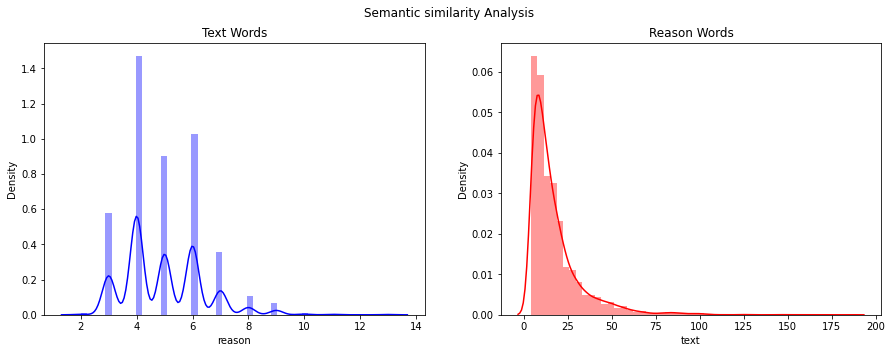

In [ ]:
#Analyse the count of words in each segment- both positive and negative reviews
#Function for checking word length

def cal_len(data):
    return len(data)

#Create generic plotter with Seaborn
def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.savefig("evaluation_count_words.png")
    plt.show()   


count_text = df['text'].str.split().apply(lambda z:cal_len(z))
count_reasons = df['reason'].str.split().apply(lambda z:cal_len(z))

print("Text Words:" + str(count_text))
print("Reason Words:" + str(count_reasons))

plot_count(count_text,count_reasons,"Text Words","Reason Words","Semantic similarity Analysis") 

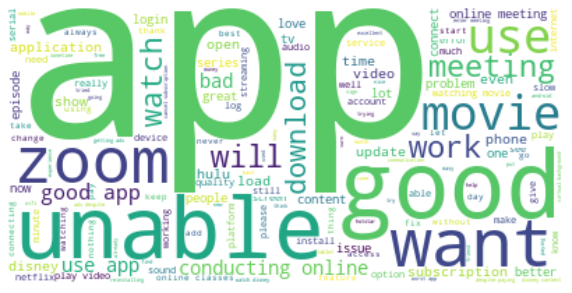

In [ ]:
from PIL import Image
from wordcloud import WordCloud,STOPWORDS
def display_cloud(data,color):
    plt.subplots(figsize=(10,10))
    wc = WordCloud(stopwords=STOPWORDS, 
                   background_color="white", contour_width=2, contour_color=color,
                   max_words=2000, max_font_size=256,
                   random_state=42)
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.savefig("evaluation_wordcloud.png")
    plt.show()
    
display_cloud(df['text']+df['reason'],'red')

In [ ]:
import re

def remove_specChar(data):
    s1=re.sub("[^A-Za-z]"," ",data)
    return s1

df['clean_text'] = df['text'].apply(lambda z: remove_specChar(z))
df['clean_reason'] = df['reason'].apply(lambda z2: remove_specChar(z2))

df

,text,reason,label,clean_text,clean_reason
0,the app is crashing when i play a vedio,app crashes during playback,1.0,the app is crashing when i play a vedio,app crashes during playback
1,but i want to connect it to the tv from one de...,want compatibility with more smart televisions,0.0,but i want to connect it to the tv from one de...,want compatibility with more smart televisions
2,very helpful when and home working remotley,good app for work,0.0,very helpful when and home working remotley,good app for work
3,this zoom so called and missed call and mobile...,receiving incorrect phone number message,0.0,this zoom so called and missed call and mobile...,receiving incorrect phone number message
4,one of my favorite apps,good for spending time,0.0,one of my favorite apps,good for spending time
...,...,...,...,...,...
8995,very good streaming platform has a lot of content,app has very good content,1.0,very good streaming platform has a lot of content,app has very good content
8996,so paying for an app that is not fit for purpose.,unable to use app,0.0,so paying for an app that is not fit for purpose,unable to use app
8997,"it does not work well for me, it loads, but if...",app keeps loading indefinitely,0.0,it does not work well for me it loads but if...,app keeps loading indefinitely
8998,i can not watch the new disney shows.,unable to load the episodes list,0.0,i can not watch the new disney shows,unable to load the episodes list


In [ ]:
import re

def small_case(data):
    s1= data.lower()
    return s1

df['clean_text'] = df['clean_text'].apply(lambda z: small_case(z))
df['clean_reason'] = df['clean_reason'].apply(lambda z2: small_case(z2))

dfi.export(
     df,
    "evaluation_clean.png",
    table_conversion="matplotlib",
    max_rows = 15
)

df

,text,reason,label,clean_text,clean_reason
0,the app is crashing when i play a vedio,app crashes during playback,1.0,the app is crashing when i play a vedio,app crashes during playback
1,but i want to connect it to the tv from one de...,want compatibility with more smart televisions,0.0,but i want to connect it to the tv from one de...,want compatibility with more smart televisions
2,very helpful when and home working remotley,good app for work,0.0,very helpful when and home working remotley,good app for work
3,this zoom so called and missed call and mobile...,receiving incorrect phone number message,0.0,this zoom so called and missed call and mobile...,receiving incorrect phone number message
4,one of my favorite apps,good for spending time,0.0,one of my favorite apps,good for spending time
...,...,...,...,...,...
8995,very good streaming platform has a lot of content,app has very good content,1.0,very good streaming platform has a lot of content,app has very good content
8996,so paying for an app that is not fit for purpose.,unable to use app,0.0,so paying for an app that is not fit for purpose,unable to use app
8997,"it does not work well for me, it loads, but if...",app keeps loading indefinitely,0.0,it does not work well for me it loads but if...,app keeps loading indefinitely
8998,i can not watch the new disney shows.,unable to load the episodes list,0.0,i can not watch the new disney shows,unable to load the episodes list


# **Training Model**

In [ ]:
from sentence_transformers import SentenceTransformer,util

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences_text = []
sentences_reason = []
df['clean_text'].apply(lambda z: sentences_text.append(z))
df['clean_reason'].apply(lambda z: sentences_reason.append(z))

#Sentences are encoded by calling model.encode()
embeddings_text = model.encode(sentences_text)
embeddings_reason = model.encode(sentences_reason)

#Print the embeddings
for sentence, embedding in zip(sentences_text, embeddings_text):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    break

for sentence, embedding in zip(sentences_reason, embeddings_reason):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    break

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Sentence: the app is crashing when i play a vedio
Embedding: [ 8.63432437e-02 -3.54890488e-02 -1.46770128e-03 -1.59689233e-01
 -1.62063483e-02 -1.39176811e-03 -4.00379822e-02  1.14161395e-01
 -7.06382142e-03  7.62386844e-02 -5.73828407e-02 -9.56492797e-02
 -5.84661253e-02 -1.19899977e-02  6.53008325e-03  4.73390445e-02
 -2.47381181e-02  7.04561323e-02  4.15333882e-02  1.96418390e-02
 -6.78217784e-02  2.69914232e-02 -1.00865010e-02  6.51750490e-02
  4.05774172e-03 -2.17765532e-02 -3.45287211e-02  4.32889126e-02
 -3.35255302e-02 -1.53387459e-02  4.62408550e-02 -4.63310145e-02
  7.09601641e-02 -8.41720612e-04  2.08832324e-03  4.06296626e-02
 -7.21908882e-02 -7.29297251e-02 -9.65697244e-02 -4.71100733e-02
 -7.67251030e-02  4.10363302e-02 -1.15890047e-02  7.38577247e-02
 -4.27002236e-02 -1.03865806e-02  4.63100746e-02  5.00028580e-02
  9.26869512e-02  4.30205353e-02 -2.63408255e-02  5.20457476e-02
  1.09540904e-02 -4.94560823e-02  4.11722884e-02  2.63423170e-03
  2.12177858e-02  6.13667332e

In [ ]:
cosine_scores = util.cos_sim(embeddings_text, embeddings_reason)

#Output the pairs with their score
for i in range(len(sentences_text)):
    print("{} \t {} \t Score: {:.4f}".format(sentences_text[i], sentences_reason[i], cosine_scores[i][i]))
    break

the app is crashing when i play a vedio 	 app crashes during playback 	 Score: 0.7233


In [ ]:
predicted_label = []
for i in range(len(sentences_text)):
  if cosine_scores[i][i] > 0.55:
    predicted_label.append(1.0)
  else:
    predicted_label.append(0.0)

df['predicted_label'] = predicted_label

dfi.export(
     df,
    "evaluation_final.png",
    table_conversion="matplotlib",
    max_rows = 15
)


df.tail(10)

,text,reason,label,clean_text,clean_reason,predicted_label
8990,based on the comments i read and the fee payme...,do not want the subscription,0.0,based on the comments i read and the fee payme...,do not want the subscription,0.0
8991,the worst ott platform i have ever seen.,poor ott platform,1.0,the worst ott platform i have ever seen,poor ott platform,1.0
8992,one thing is when i tried to use it on my onli...,unable to hear sound,1.0,one thing is when i tried to use it on my onli...,unable to hear sound,1.0
8993,"it is a nice app, a single problem that does n...",app keeps loading indefinitely,1.0,it is a nice app a single problem that does n...,app keeps loading indefinitely,1.0
8994,hulu has become the best affordable streaming ...,good for watching movies and serials,0.0,hulu has become the best affordable streaming ...,good for watching movies and serials,0.0
8995,very good streaming platform has a lot of content,app has very good content,1.0,very good streaming platform has a lot of content,app has very good content,1.0
8996,so paying for an app that is not fit for purpose.,unable to use app,0.0,so paying for an app that is not fit for purpose,unable to use app,0.0
8997,"it does not work well for me, it loads, but if...",app keeps loading indefinitely,0.0,it does not work well for me it loads but if...,app keeps loading indefinitely,0.0
8998,i can not watch the new disney shows.,unable to load the episodes list,0.0,i can not watch the new disney shows,unable to load the episodes list,0.0
8999,really if i rewind a seconde before the ad end...,getting ads frequently,0.0,really if i rewind a seconde before the ad end...,getting ads frequently,0.0


In [ ]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(df['label'], df['predicted_label'])}")

Accuracy of the classifier is: 0.7622222222222222


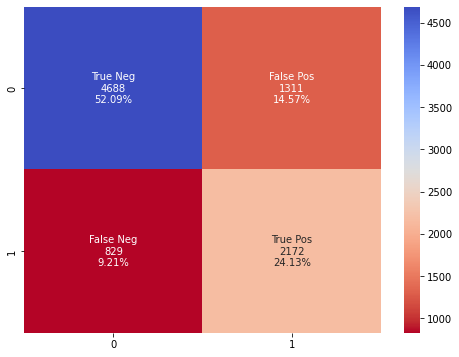

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
cf_matrix = confusion_matrix(df['label'], df['predicted_label'])

plt.figure(figsize=(8,6))


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]



labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
          
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix,annot=labels, fmt='',cmap = "coolwarm_r")
plt.savefig("heat_map.png")
plt.show()

In [ ]:
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(df['label'], df['predicted_label'])}")

Precision Score of the classifier is: 0.6236003445305771


In [ ]:
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(df['label'], df['predicted_label'])}")

Recall Score of the classifier is: 0.7237587470843052


In [ ]:
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(df['label'], df['predicted_label'])}")

F1 Score of the classifier is: 0.6699568167797656


AUC for our classifier is: 0.7526111621735911


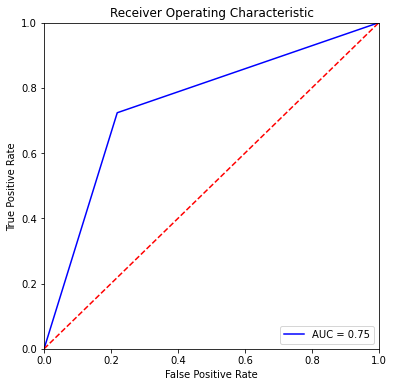

In [ ]:
from sklearn.metrics import roc_curve, auc

preds = df['predicted_label']

fpr, tpr, threshold = roc_curve(df['label'], preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('roc_auc_curve_eval.png')
plt.show()

# **HyperParameter Tuning**

In [ ]:
from sentence_transformers import SentenceTransformer, models,util
from torch import nn

word_embedding_model = models.Transformer('bert-base-uncased', max_seq_length=256)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=256, activation_function=nn.Tanh())

model = SentenceTransformer(modules=[word_embedding_model, pooling_model, dense_model])

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
#Our sentences we like to encode
sentences_text = []
sentences_reason = []
df['clean_text'].apply(lambda z: sentences_text.append(z))
df['clean_reason'].apply(lambda z: sentences_reason.append(z))

#Sentences are encoded by calling model.encode()
embeddings_text = model.encode(sentences_text)
embeddings_reason = model.encode(sentences_reason)

#Print the embeddings
for sentence, embedding in zip(sentences_text, embeddings_text):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    break

for sentence, embedding in zip(sentences_reason, embeddings_reason):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    break

Sentence: the app is crashing when i play a vedio
Embedding: [ 2.66254932e-01 -3.15191895e-02  2.88919270e-01 -3.21698636e-01
  2.62633979e-01  2.61955351e-01 -5.99785820e-02  1.41968802e-02
 -8.05125311e-02 -1.83315605e-01  1.71649441e-01  8.35691914e-02
  1.55116007e-01  4.41473246e-01  4.15131673e-02  4.01208460e-01
 -3.04020941e-04 -8.87217559e-03 -3.11915465e-02  5.03806472e-02
  3.33835423e-01  1.15171105e-01 -9.44114998e-02 -1.49701372e-01
  4.58389699e-01 -9.90558043e-03  7.21639171e-02  9.06326249e-03
 -9.74903479e-02  3.14584188e-02 -1.88085604e-02 -6.47320747e-02
 -4.44575921e-02  1.84749857e-01 -1.27324134e-01  1.73307136e-01
 -1.98391438e-01  5.23097068e-02 -6.62617013e-02  6.00933284e-02
 -6.63318634e-02  8.10677931e-02  1.55450525e-02 -5.83391972e-02
 -3.83574143e-02 -1.63497835e-01  7.56456703e-02 -2.85595506e-01
  3.97161961e-01  1.48193715e-02 -1.26703203e-01 -1.45280614e-01
 -1.42257258e-01  2.23337114e-01 -3.96647640e-02  1.35228187e-01
 -5.08027226e-02 -1.95100009e

In [ ]:
cosine_scores = util.cos_sim(embeddings_text, embeddings_reason)

#Output the pairs with their score
for i in range(len(sentences_text)):
    print("{} \t {} \t Score: {:.4f}".format(sentences_text[i], sentences_reason[i], cosine_scores[i][i]))
    break

the app is crashing when i play a vedio 	 app crashes during playback 	 Score: 0.7137


In [ ]:
predicted_label_custom = []
for i in range(len(sentences_text)):
  if cosine_scores[i][i] > 0.55:
    predicted_label_custom.append(1.0)
  else:
    predicted_label_custom.append(0.0)

df['predicted_label_custom'] = predicted_label_custom

df.tail(10)

,text,reason,label,clean_text,clean_reason,predicted_label_custom
8990,based on the comments i read and the fee payme...,do not want the subscription,0.0,based on the comments i read and the fee payme...,do not want the subscription,1.0
8991,the worst ott platform i have ever seen.,poor ott platform,1.0,the worst ott platform i have ever seen,poor ott platform,1.0
8992,one thing is when i tried to use it on my onli...,unable to hear sound,1.0,one thing is when i tried to use it on my onli...,unable to hear sound,1.0
8993,"it is a nice app, a single problem that does n...",app keeps loading indefinitely,1.0,it is a nice app a single problem that does n...,app keeps loading indefinitely,1.0
8994,hulu has become the best affordable streaming ...,good for watching movies and serials,0.0,hulu has become the best affordable streaming ...,good for watching movies and serials,1.0
8995,very good streaming platform has a lot of content,app has very good content,1.0,very good streaming platform has a lot of content,app has very good content,1.0
8996,so paying for an app that is not fit for purpose.,unable to use app,0.0,so paying for an app that is not fit for purpose,unable to use app,1.0
8997,"it does not work well for me, it loads, but if...",app keeps loading indefinitely,0.0,it does not work well for me it loads but if...,app keeps loading indefinitely,1.0
8998,i can not watch the new disney shows.,unable to load the episodes list,0.0,i can not watch the new disney shows,unable to load the episodes list,1.0
8999,really if i rewind a seconde before the ad end...,getting ads frequently,0.0,really if i rewind a seconde before the ad end...,getting ads frequently,1.0


In [ ]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(df['label'], df['predicted_label_custom'])}")

Accuracy of the classifier is: 0.3868888888888889


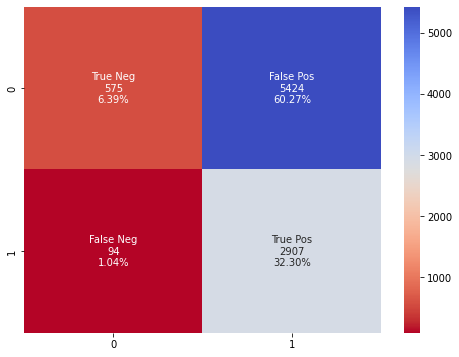

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
cf_matrix = confusion_matrix(df['label'], df['predicted_label_custom'])

plt.figure(figsize=(8,6))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]



labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
          
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix,annot=labels, fmt='',cmap = "coolwarm_r")

In [ ]:
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(df['label'], df['predicted_label_custom'])}")

Precision Score of the classifier is: 0.34893770255671586


In [ ]:
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(df['label'], df['predicted_label_custom'])}")

Recall Score of the classifier is: 0.9686771076307897


In [ ]:
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(df['label'], df['predicted_label_custom'])}")

F1 Score of the classifier is: 0.5130603600423579


# **Study 2 - bert-large-cased**

In [ ]:
from sentence_transformers import SentenceTransformer, models,util
from torch import nn

word_embedding_model = models.Transformer('bert-base-cased', max_seq_length=256)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=256, activation_function=nn.Tanh())

model = SentenceTransformer(modules=[word_embedding_model, pooling_model, dense_model])

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
#Our sentences we like to encode
sentences_text = []
sentences_reason = []
df['clean_text'].apply(lambda z: sentences_text.append(z))
df['clean_reason'].apply(lambda z: sentences_reason.append(z))

#Sentences are encoded by calling model.encode()
embeddings_text = model.encode(sentences_text)
embeddings_reason = model.encode(sentences_reason)

#Print the embeddings
for sentence, embedding in zip(sentences_text, embeddings_text):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    break

for sentence, embedding in zip(sentences_reason, embeddings_reason):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    break

Sentence: the app is crashing when i play a vedio
Embedding: [-0.14542396  0.12016906  0.29477295  0.1923113   0.13237911 -0.09247021
 -0.02301022  0.04190196  0.4059543   0.23523653 -0.16334859  0.15775917
  0.12476417  0.3432735  -0.16877246 -0.2985329  -0.08352733  0.19413954
 -0.15882385 -0.01368404  0.1004185   0.06426492  0.1619841  -0.14283557
 -0.35081127 -0.09770572  0.08575887  0.09947304  0.13960773  0.3531393
  0.04393345  0.1606134  -0.4328529   0.4423415   0.09830724  0.37326902
 -0.03940823 -0.3359489   0.06689528 -0.12921171  0.22568733  0.18080133
  0.03521354 -0.00558842 -0.01038655  0.05854701  0.07576176  0.23061383
  0.14706416 -0.01016448  0.04443618  0.17005913  0.26434034  0.17876509
 -0.14034618  0.32619235  0.11871283  0.1793095  -0.4095212   0.15569024
 -0.10520542 -0.1959261   0.18408586 -0.3497486  -0.2608205  -0.31143373
 -0.36714718 -0.20282492 -0.01582215 -0.09311857 -0.11639571 -0.13434775
  0.2749224  -0.2721142  -0.05584249 -0.08135463 -0.26092085 -0.

In [ ]:
cosine_scores = util.cos_sim(embeddings_text, embeddings_reason)

#Output the pairs with their score
for i in range(len(sentences_text)):
    print("{} \t {} \t Score: {:.4f}".format(sentences_text[i], sentences_reason[i], cosine_scores[i][i]))
    break

the app is crashing when i play a vedio 	 app crashes during playback 	 Score: 0.8563


In [ ]:
predicted_label_custom = []
for i in range(len(sentences_text)):
  if cosine_scores[i][i] > 0.55:
    predicted_label_custom.append(1.0)
  else:
    predicted_label_custom.append(0.0)

df['predicted_label_custom'] = predicted_label_custom

df.tail(10)

,text,reason,label,clean_text,clean_reason,predicted_label_custom
8990,based on the comments i read and the fee payme...,do not want the subscription,0.0,based on the comments i read and the fee payme...,do not want the subscription,1.0
8991,the worst ott platform i have ever seen.,poor ott platform,1.0,the worst ott platform i have ever seen,poor ott platform,1.0
8992,one thing is when i tried to use it on my onli...,unable to hear sound,1.0,one thing is when i tried to use it on my onli...,unable to hear sound,1.0
8993,"it is a nice app, a single problem that does n...",app keeps loading indefinitely,1.0,it is a nice app a single problem that does n...,app keeps loading indefinitely,1.0
8994,hulu has become the best affordable streaming ...,good for watching movies and serials,0.0,hulu has become the best affordable streaming ...,good for watching movies and serials,1.0
8995,very good streaming platform has a lot of content,app has very good content,1.0,very good streaming platform has a lot of content,app has very good content,1.0
8996,so paying for an app that is not fit for purpose.,unable to use app,0.0,so paying for an app that is not fit for purpose,unable to use app,1.0
8997,"it does not work well for me, it loads, but if...",app keeps loading indefinitely,0.0,it does not work well for me it loads but if...,app keeps loading indefinitely,1.0
8998,i can not watch the new disney shows.,unable to load the episodes list,0.0,i can not watch the new disney shows,unable to load the episodes list,1.0
8999,really if i rewind a seconde before the ad end...,getting ads frequently,0.0,really if i rewind a seconde before the ad end...,getting ads frequently,1.0


In [ ]:
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(df['label'], df['predicted_label_custom'])}")

Accuracy of the classifier is: 0.3337777777777778


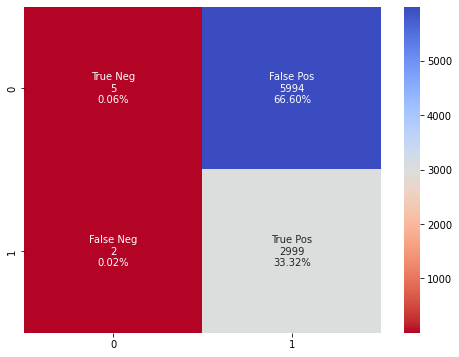

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
cf_matrix = confusion_matrix(df['label'], df['predicted_label_custom'])

plt.figure(figsize=(8,6))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]



labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
          
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix,annot=labels, fmt='',cmap = "coolwarm_r")

In [ ]:
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(df['label'], df['predicted_label_custom'])}")

Precision Score of the classifier is: 0.33348159679750916


In [ ]:
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(df['label'], df['predicted_label_custom'])}")

Recall Score of the classifier is: 0.9993335554815062


In [ ]:
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(df['label'], df['predicted_label_custom'])}")

F1 Score of the classifier is: 0.5000833750208438


In [ ]:
class Node:
 
    # Constructor to create a new node
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
 
# Compute the "maxDepth" of a tree -- the number of nodes
# along the longest path from the root node down to the
# farthest leaf node
 
 
def maxDepth(node):
    if node is None:
        return 0
 
    else:
 
        # Compute the depth of each subtree
        lDepth = maxDepth(node.left)
        rDepth = maxDepth(node.right)
 
        # Use the larger one
        if (lDepth > rDepth):
            return lDepth+1
        else:
            return rDepth+1
 
 
# Driver program to test above function
root = Node(12)
root.left = Node(11)
root.right = Node(15)
root.left.left = Node(13)
root.left.right = Node(14)
 
 
print("Height of tree is %d" % (maxDepth(root)))

Height of tree is 3
